In [1]:
import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
rawtext = ''
for i in range(1, 4):
    textfile = open('data/text/{}.txt'.format(i))
    rawtext += textfile.read()
    textfile.close()
vectext = rawtext.split()

In [3]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [4]:
wordEnc = LabelEncoder()
enctext = wordEnc.fit_transform(vectext)
wordEnc.classes_

array(['(Machine', '(Python', '(Regional', '(Single', '(You', '(pandas',
       '(which', 'After', 'All', 'At', 'Building', 'C)', 'Capstone',
       'Commerce', 'Convolution', 'Cython', 'David', 'David,',
       'Detection),', 'During', 'Faster', 'Following', 'Friday', 'From',
       'GPU', 'Hall', 'Hall.', 'Hall.This', 'I', 'In', 'King', 'Learning',
       'Look', 'MLND', 'Mason,', 'My', 'Nanodegree)', 'Network),',
       'Neural', 'Once),', 'Only', 'Outside', 'R', 'R-CNN', 'R.',
       'Retinanet', 'SSD', 'Shot', 'Some', 'TATSIAVI.The', 'The', 'This',
       'Though', 'Throughout', 'Thursday', 'Tuesday', 'We', 'YOLO', 'a',
       'able', 'about', 'accuracy', 'acquainted', 'activity.', 'all',
       'also', 'ambiguous', 'amount', 'an', 'analysis', 'analysis.',
       'analyze', 'and', 'arduous', 'are', 'around', 'as', 'aspect).',
       'assets', 'assist', 'at', 'attending.', 'automobile', 'autonomous',
       'available', 'background', 'background.', 'balance', 'based', 'be',
       

In [5]:
from keras.models import Sequential
from keras.layers.core import Dropout, Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report

In [6]:
#First model - given n words, predict the next

In [6]:
#Assemble data
X = []
Y = []
n = 10
for i in range(n, len(vectext)):
    #print('{} <- {}'.format(enctext[i], enctext[i-n:i]))
    X += [enctext[i-n:i]]
    Y += [enctext[i]]
X = np.array(X)
Y = np.array(Y)

In [7]:
yenc = LabelBinarizer()
yb = yenc.fit_transform(Y)

In [8]:
xb = np.array([yenc.transform(_) for _ in X])
xb = xb.reshape(-1, xb.shape[1]*xb.shape[-1])

In [9]:
xb[0]

array([0, 0, 0, ..., 0, 0, 0])

In [328]:
o = Sequential()
o.add(Dense(1536, input_shape = (xb.shape[1],), activation = 'relu'))
o.add(Dense(1024, activation='relu'))
#o.add(Dropout(0.1))
o.add(Dense(512, activation='relu'))
o.add(Dense(yb.shape[1], activation='softmax'))

In [329]:
initial_learningrate = 0.1
_sgd = SGD(lr = initial_learningrate)
o.compile(loss = "categorical_crossentropy", optimizer = _sgd, metrics=["accuracy"])

In [330]:
hist = o.fit(xb, yb, epochs=10, batch_size=4)

Epoch 1/10
323/323 [==============================] - 6s 20ms/step - loss: 5.0150 - acc: 0.0526
Epoch 2/10
323/323 [==============================] - 6s 17ms/step - loss: 4.7448 - acc: 0.0743
Epoch 3/10
323/323 [==============================] - 6s 17ms/step - loss: 4.4483 - acc: 0.0836
Epoch 4/10
323/323 [==============================] - 6s 17ms/step - loss: 3.9499 - acc: 0.1393
Epoch 5/10
323/323 [==============================] - 6s 17ms/step - loss: 3.2661 - acc: 0.2879
Epoch 6/10
323/323 [==============================] - 6s 17ms/step - loss: 2.4076 - acc: 0.5170
Epoch 7/10
323/323 [==============================] - 6s 17ms/step - loss: 1.5141 - acc: 0.7214
Epoch 8/10
323/323 [==============================] - 6s 17ms/step - loss: 0.7226 - acc: 0.9752
Epoch 9/10
323/323 [==============================] - 6s 18ms/step - loss: 0.1497 - acc: 1.0000
Epoch 10/10
323/323 [==============================] - 6s 17ms/step - loss: 0.0335 - acc: 1.0000


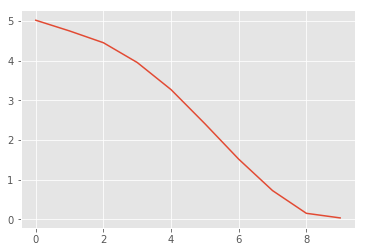

In [331]:
plt.style.use("ggplot")
plt.plot(hist.history['loss'])

In [264]:
s = vectext[5:10]
_x = yenc.transform(wordEnc.transform(s)).reshape(1, -1)
_y = wordEnc.classes_[o.predict_classes(_x)]
print('{} <- {}'.format(_y, s))

['was'] <- ['to', 'the', 'research', 'environment', 'that']


In [333]:
s = vectext[:10]
[print(_, end = ' ') for _ in s]
print('*', end=' ')
for i in range(100):
    _x = yenc.transform(wordEnc.transform(s)).reshape(1, -1)
    _y = wordEnc.classes_[o.predict_classes(_x)]
    
    print(_y[0], end = ' ')
    
    s.pop(0)
    s += [_y[0]]


This week we were introduced to the research environment that * video what background with which focused next technologies We did methods our between image preparing material automobile verify done as methods outside technologies done week currently We formulating plan three technologies focused next was creating week and two summer. Throughout technologies focused next at an preparing methods technologies revolves divided creating The material. verify two acquainted three technologies help technologies processing. Throughout methods methods technologies help two outside methods technologies technologies two Throughout technologies regulations our technologies preparing technologies focused next computer around two vehicle outside help two outside was formulating into We regarding assist regulations both trip three an 

In [11]:
#Generate a sequence of words by outputting a flat binary map, in the shape of a record of xb
def createGenerator():
    gen = Sequential()
    gen.add(Dense(48, input_shape = (8,), activation = 'relu'))
    gen.add(Dense(128, activation = 'relu'))
    gen.add(Dropout(0.2))
    gen.add(Dense(256, activation = 'relu'))
    gen.add(Dense(512, activation = 'relu'))
    gen.add(Dense(xb.shape[1], activation = 'relu'))
    return gen

In [107]:
batchsize = 800#xb.shape[0]
def generatorBatch(gen):
    gen_inp = np.abs(np.random.standard_normal((batchsize,8)))
    gen_batch = gen.predict(gen_inp).reshape(batchsize, n, -1)
    return gen_batch

In [13]:
def createDescriminator():
    des = Sequential()
    des.add(Dense(xb.shape[1], input_shape = (xb.shape[1], ), activation = 'relu'))
    des.add(Dense(512, activation = 'relu'))
    des.add(Dense(128, activation = 'relu'))
    #des.add(Dense(2, activation = 'softmax'))
    des.add(Dense(1, activation = 'tanh'))
    initial_learningrate = 0.02
    _sgd = SGD(lr = initial_learningrate)
    des.compile(loss = "mse", optimizer = _sgd, metrics=["accuracy"])
    return des

In [108]:
def genDesTrainingInp(gen_batch):
    des_X = np.array([xb, gen_batch.reshape(batchsize, -1)]).reshape(-1, xb.shape[1])
    des_Y = np.array([1]*xb.shape[0] + [-1]*gen_batch.shape[0])
    return des_X, des_Y

In [15]:
def fullBatch():
    full_X = np.abs(np.random.standard_normal((batchsize,8)))
    full_Y = np.array([1]*batchsize) #[[0, 1]] was not working???
    return full_X, full_Y

In [16]:
def decodeResult(val):
    enc = yenc.inverse_transform(val)
    return wordEnc.inverse_transform(enc)

In [26]:
full_history = []
big_epoch, m_epochs = 2, 2
print('hold on tight...')
g = createGenerator()
d = createDescriminator()

print('Before:')
print(decodeResult(g.predict([[[1,2,3,4,5,6,7,0]]]).reshape(10, -1)))

for i in range(big_epoch):
    print('================EPOCH #{}================'.format(i))
    batch = generatorBatch(g)
    tx, ty = genDesTrainingInp(batch)

    full_history += [d.fit(tx, ty, epochs=m_epochs, batch_size=76)]

    x, y = fullBatch()
    g.add(keras.models.clone_model(d))
    initial_learningrate = 0.01
    _sgd = SGD(lr = initial_learningrate)
    g.compile(loss = "mse", optimizer = _sgd, metrics=["accuracy"])
    full_history += [g.fit(x, y, epochs=m_epochs, batch_size=128)]
    g.pop()
results = generatorBatch(g)

print('After:')
print(decodeResult(g.predict([[[1,2,3,4,5,6,7,0]]]).reshape(10, -1)))

hold on tight...
Before:


/home/mkeays/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['group' 'developed' 'making' 'own' 'standards' 'learning' 'digging'
 'next' 'making' 'finding']
================EPOCH #0================
Epoch 1/2
2074/2074 [==============================] - 17s 8ms/step - loss: 0.6042 - acc: 0.0554
Epoch 2/2
2074/2074 [==============================] - 16s 8ms/step - loss: 0.1316 - acc: 0.9253
Epoch 1/2
1037/1037 [==============================] - 13s 12ms/step - loss: 0.6434 - acc: 9.6432e-04
Epoch 2/2
1037/1037 [==============================] - 12s 12ms/step - loss: 0.2147 - acc: 0.7030
================EPOCH #1================
Epoch 1/2
2074/2074 [==============================] - 19s 9ms/step - loss: 0.0356 - acc: 0.9990
Epoch 2/2
2074/2074 [==============================] - 19s 9ms/step - loss: 0.0193 - acc: 0.9995
Epoch 1/2
 256/1037 [======>.......................] - ETA: 1:39 - loss: 0.8957 - acc: 0.0000e+00

/home/mkeays/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (1.535854). Check your callbacks.
  % delta_t_median)


1037/1037 [==============================] - 42s 41ms/step - loss: 0.5598 - acc: 0.0492
Epoch 2/2
1037/1037 [==============================] - 11s 11ms/step - loss: 0.1380 - acc: 0.9614
After:
['group' 'use' 'making' 'old' 'standards' 'learning' 'an' 'next' 'later'
 'finding']


/home/mkeays/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
d.optimizer.lr.read_value

<bound method Variable.read_value of <tf.Variable 'SGD_6/lr:0' shape=() dtype=float32_ref>>

In [106]:
#[print(_, end=' ') for _ in decodeResult(g.predict([[[1,0,3.1,-2,4,6,29,7]]]).reshape(10, -1))]
#print()
[print(_, end=' ') for _ in decodeResult(g.predict(np.random.standard_normal((1, 8))).reshape(10, -1))]
None

individual SSD did tough classifying learning implementation. growing expectations. training 

/home/mkeays/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
